In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
pr=pd.read_csv('QVI_purchase_behaviour.csv')
tr= pd.read_excel('QVI_transaction_data.xlsx')

In [4]:
pr.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
pr.shape

(72637, 3)

In [6]:
tr.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
pr.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [8]:
pr.shape
pr.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [9]:
tr.shape
tr.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [10]:
tr.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [11]:
def convert_to_datetime(num):
    dt=datetime.fromordinal(datetime(1900,1,1).toordinal() + num-2)
    return dt

In [12]:
tr.DATE=tr.DATE.apply(convert_to_datetime)

In [13]:
tr.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
DF=tr.copy()

In [15]:
tr.PROD_NAME=tr.PROD_NAME.str.replace('\d+g','')

In [16]:
tr.PROD_NAME=tr.PROD_NAME.str.replace('\&','')

In [17]:
tr.PROD_NAME=tr.PROD_NAME.str.replace('\/','')

In [18]:
fre=tr.PROD_NAME.value_counts()
fre

Kettle Mozzarella   Basil  Pesto       3304
Kettle Tortilla ChpsHnyJlpno Chili     3296
Cobs Popd SwtChlli SrCream Chips       3269
Tyrrells Crisps     Ched  Chives       3268
Cobs Popd Sea Salt  Chips              3265
                                       ... 
RRD Pc Sea Salt                        1431
Woolworths Medium   Salsa              1430
NCC Sour Cream     Garden Chives       1419
French Fries Potato Chips              1418
WW Crinkle Cut      Original           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [19]:
def remove_word(tr):
    unwanted="salsa"
    if unwanted in tr.PROD_NAME.lower().split():
        return tr.name    
    


In [20]:
drop_index=list(tr.apply(remove_word, axis =1))


In [21]:
old_df=tr.copy()

In [22]:
tr=tr.drop([i for i in drop_index if ~np.isnan(i)])
tr

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8


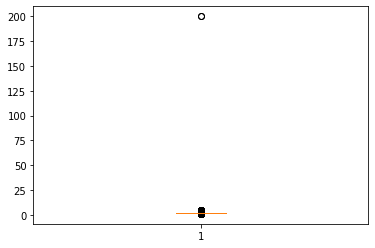

In [23]:
plt.boxplot(tr.PROD_QTY)
plt.show()

In [24]:
tr[tr.PROD_QTY > 100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0


In [25]:
tr=tr[tr.PROD_QTY<200].reset_index(drop=True)

In [26]:
tr.DATE.value_counts()

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

In [27]:
tr.groupby(tr.DATE).agg('count').describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143
std,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536
min,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
25%,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
50%,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
75%,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000
max,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000


In [28]:
#### Create a sequence of dates and join this the count of transactions by date

In [29]:
#### Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.

In [30]:
tr['PACKET_SIZE']=DF.PROD_NAME.str.extract('(\d+)', expand=True)

In [31]:
tr['PACKET_SIZE'].value_counts()

175    61967
150    40324
134    23253
110    20668
170    18642
165    14317
300    14145
330    11609
380     5940
270     5795
210     5792
200     4221
135     3016
250     2942
90      2840
190     2824
160     2790
220     1476
70      1420
180     1382
125     1377
Name: PACKET_SIZE, dtype: int64

<AxesSubplot:xlabel='No of Packets', ylabel='Packets Size'>

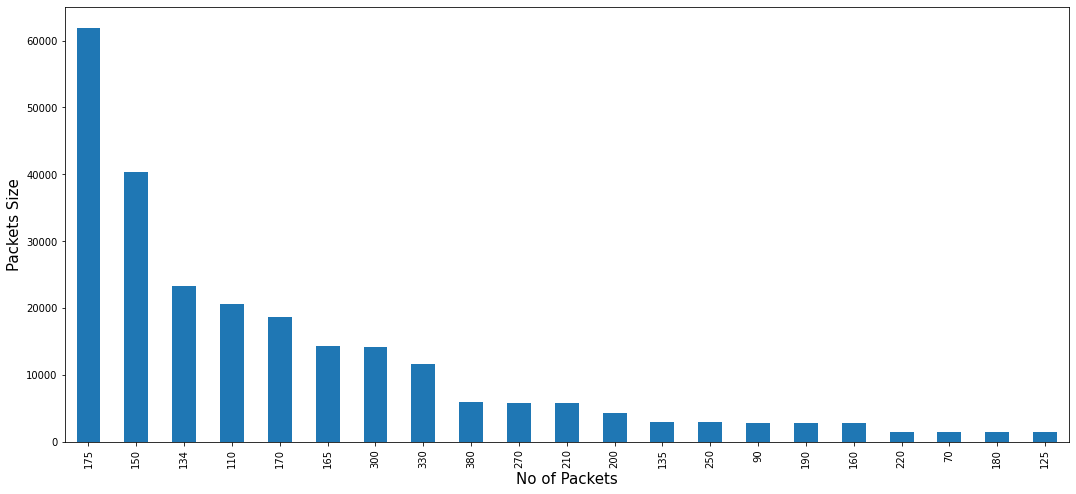

In [32]:

plt.xlabel('No of Packets',{'fontsize':15})
plt.ylabel('Packets Size',{'fontsize':15} )
tr.PACKET_SIZE.value_counts().plot(kind='bar', figsize=(18,8))

In [33]:
tr['BRAND']=tr.PROD_NAME.str.split(' ').str[0]

In [34]:
tr.BRAND=tr.BRAND.replace('RRD','Red')

In [35]:
tr.BRAND=tr.BRAND.replace('Dorito','Doritos')

In [36]:


d = {'red':'RRD','ww':'WOOLWORTHS','NCC':'NATURAL','Snbts':'SUNBITES','Infzns':'INFUZIONS','Smith':'SMITHS','dorito':'DORITOS','Grain':'GRNWVES'}
tr.BRAND=tr.BRAND.replace(d)

In [37]:
tr.BRAND=tr.BRAND.replace('WW','Woolworths')

In [38]:
tr.BRAND.value_counts()

Kettle        41288
Smiths        27390
Doritos       25224
Pringles      25102
Red           16321
Thins         14075
Woolworths    11836
Infuzions     11057
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
GRNWVES        6272
Natural        6050
Cheezels       4603
CCs            4551
INFUZIONS      3144
SMITHS         2963
Cheetos        2927
SUNBITES       1576
Burger         1564
GrnWves        1468
Sunbites       1432
NATURAL        1419
French         1418
Name: BRAND, dtype: int64

<AxesSubplot:xlabel='No of Transactions', ylabel='Brands'>

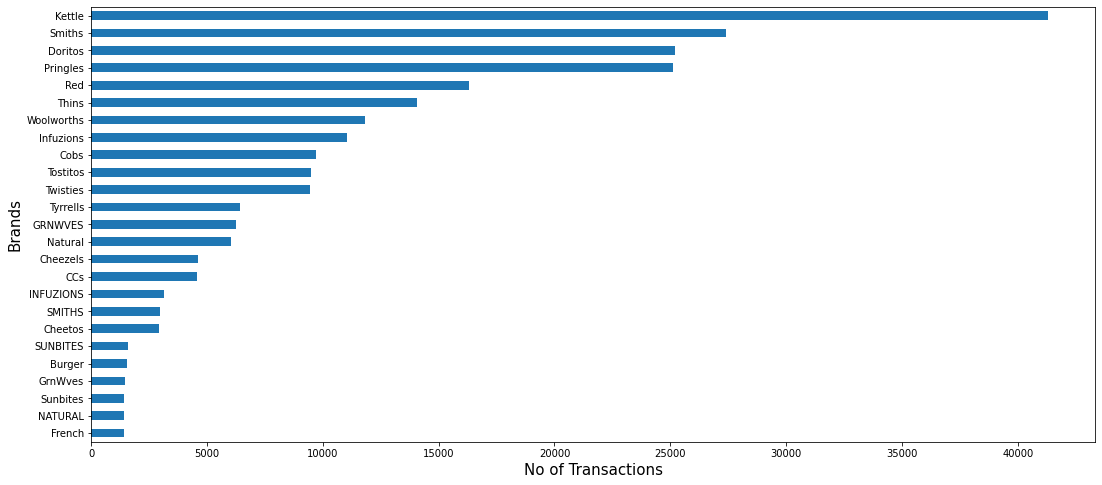

In [39]:
plt.xlabel('No of Transactions',{'fontsize':15})
plt.ylabel('Brands',{'fontsize':15})
tr.BRAND.value_counts().sort_values().plot(kind='barh',figsize=(18,8))

In [40]:
pr.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [41]:
pr.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [42]:
combined_data=tr.join(pr.set_index('LYLTY_CARD_NBR'), on='LYLTY_CARD_NBR')

In [63]:
customer_groups = combined_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum','PROD_QTY':'sum'}).sort_values('TOT_SALES').reset_index()
customer_groups['SEGMENT'] = customer_groups.LIFESTAGE + '_' + customer_groups.PREMIUM_CUSTOMER

In [64]:
customer_groups.set_index=True

In [65]:
customer_groups

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,SEGMENT
0,NEW FAMILIES,Premium,10760.80,2769,NEW FAMILIES_Premium
1,NEW FAMILIES,Mainstream,15979.70,4060,NEW FAMILIES_Mainstream
2,NEW FAMILIES,Budget,20607.45,5241,NEW FAMILIES_Budget
3,MIDAGE SINGLES/COUPLES,Budget,33345.70,8883,MIDAGE SINGLES/COUPLES_Budget
4,YOUNG SINGLES/COUPLES,Premium,39052.30,10575,YOUNG SINGLES/COUPLES_Premium
5,MIDAGE SINGLES/COUPLES,Premium,54443.85,14400,MIDAGE SINGLES/COUPLES_Premium
6,YOUNG SINGLES/COUPLES,Budget,57122.10,15500,YOUNG SINGLES/COUPLES_Budget
7,OLDER FAMILIES,Premium,75242.60,20239,OLDER FAMILIES_Premium
8,YOUNG FAMILIES,Premium,78571.70,20901,YOUNG FAMILIES_Premium
9,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,21213,MIDAGE SINGLES/COUPLES_Mainstream


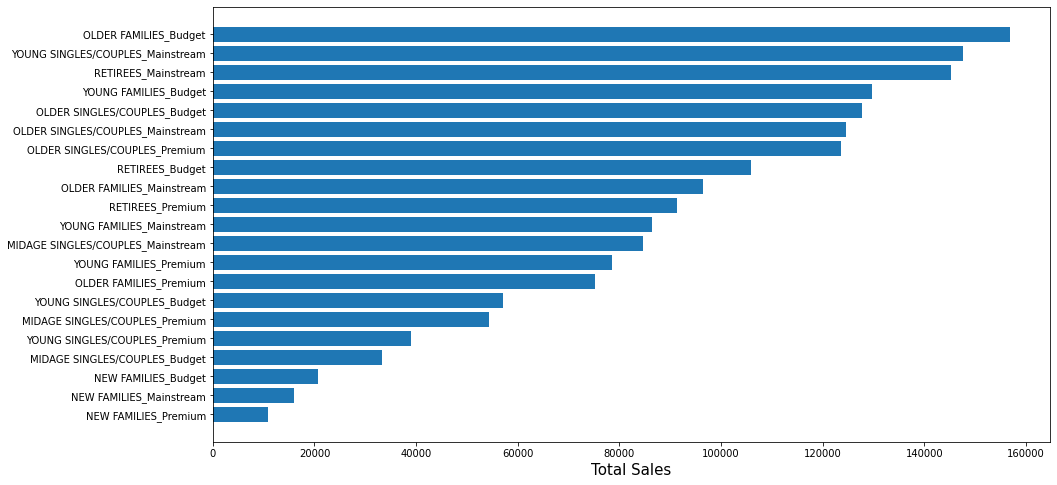

In [66]:
x=list(customer_groups.SEGMENT)
y=list(customer_groups.TOT_SALES)
plt.figure(figsize=(15,8))
plt.xlabel("Total Sales",{'fontsize':15})
plt.barh(x,y)
plt.show()

In [75]:
sales_pc=combined_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'PROD_QTY': 'sum','TOT_SALES':'sum','TXN_ID':'count'}).reset_index().sort_values('TOT_SALES')

In [78]:
sales_pc['SEGMENT']=customer_groups.LIFESTAGE + '_' + customer_groups.PREMIUM_CUSTOMER
sales_pc['SALES_PC']=sales_pc.TOT_SALES/sales_pc.TXN_ID
sales_pc['QTY_PC']=sales_pc.PROD_QTY/sales_pc.TXN_ID
sales_pc['AVG_RP']=sales_pc.TOT_SALES/sales_pc.PROD_QTY


In [79]:
sales_pc

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES,TXN_ID,SEGMENT,SALES_PC,QTY_PC,AVG_RP
5,NEW FAMILIES,Premium,2769,10760.80,1488,MIDAGE SINGLES/COUPLES_Premium,7.231720,1.860887,3.886168
4,NEW FAMILIES,Mainstream,4060,15979.70,2185,YOUNG SINGLES/COUPLES_Premium,7.313364,1.858124,3.935887
3,NEW FAMILIES,Budget,5241,20607.45,2824,MIDAGE SINGLES/COUPLES_Budget,7.297256,1.855878,3.931969
0,MIDAGE SINGLES/COUPLES,Budget,8883,33345.70,4691,NEW FAMILIES_Premium,7.108442,1.893626,3.753878
20,YOUNG SINGLES/COUPLES,Premium,10575,39052.30,5852,OLDER FAMILIES_Budget,6.673325,1.807075,3.692889
2,MIDAGE SINGLES/COUPLES,Premium,14400,54443.85,7612,NEW FAMILIES_Budget,7.152371,1.891750,3.780823
18,YOUNG SINGLES/COUPLES,Budget,15500,57122.10,8573,RETIREES_Mainstream,6.663023,1.808002,3.685297
8,OLDER FAMILIES,Premium,20239,75242.60,10403,YOUNG FAMILIES_Premium,7.232779,1.945496,3.717703
17,YOUNG FAMILIES,Premium,20901,78571.70,10784,YOUNG FAMILIES_Budget,7.285951,1.938149,3.759232
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,84734.25,11095,NEW FAMILIES_Mainstream,7.637156,1.911942,3.994449


<BarContainer object of 21 artists>

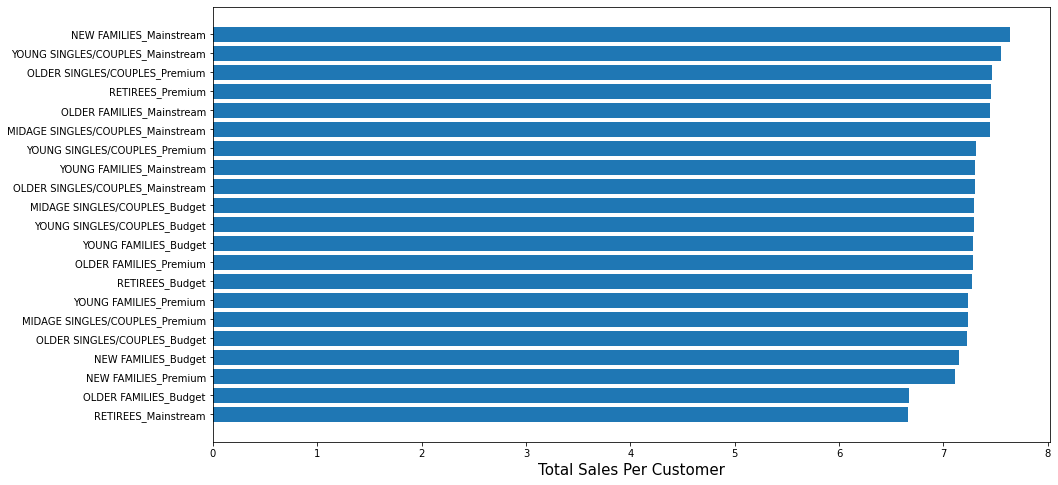

In [80]:
sales_pc = sales_pc.sort_values("SALES_PC")
x = list(sales_pc.SEGMENT)
y = list(sales_pc.SALES_PC)
plt.figure(figsize=(15,8))
plt.xlabel("Total Sales Per Customer",{'fontsize':15})
plt.barh(x,y)

<BarContainer object of 21 artists>

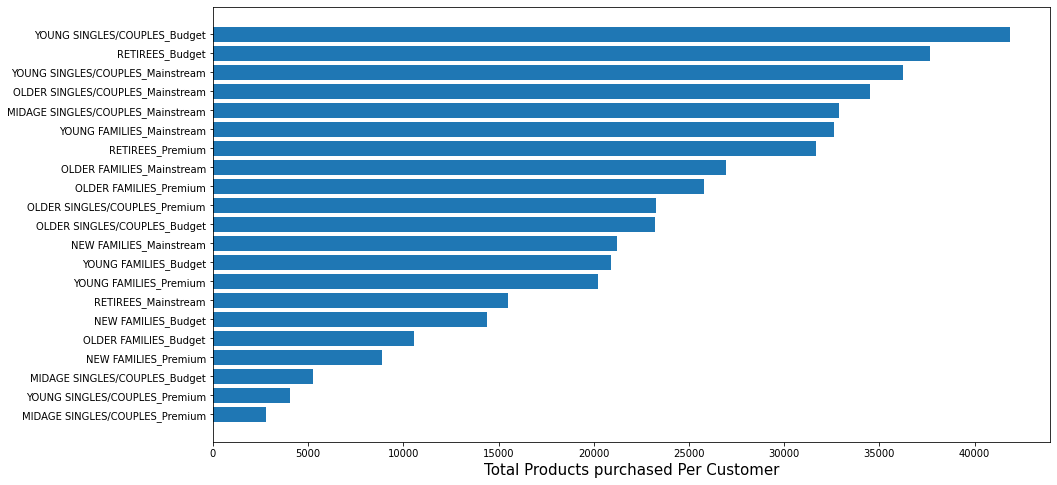

In [81]:
sales_pc = sales_pc.sort_values("PROD_QTY")
x = list(sales_pc.SEGMENT)
y = list(sales_pc.PROD_QTY)
plt.figure(figsize=(15,8))
plt.xlabel("Total Products purchased Per Customer",{'fontsize':15})
plt.barh(x,y)

<BarContainer object of 21 artists>

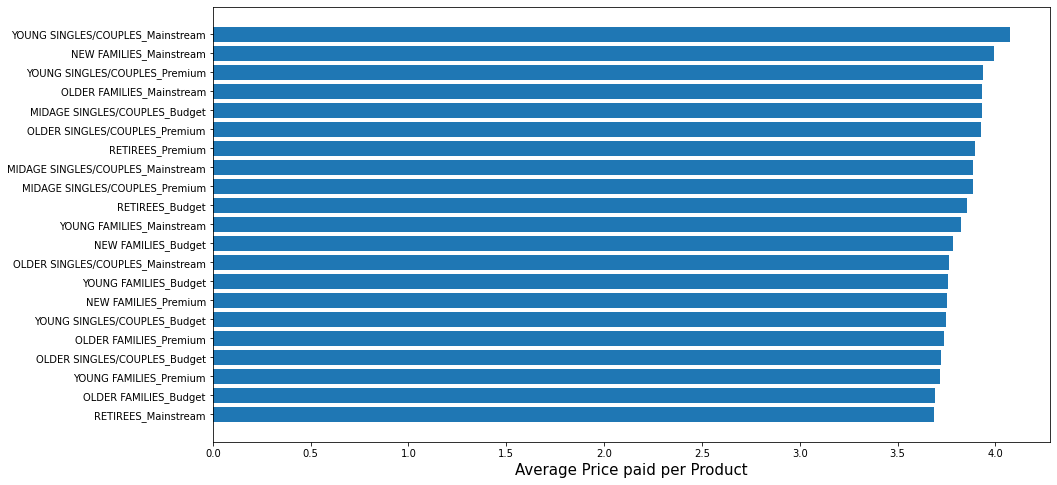

In [84]:
sales_pc = sales_pc.sort_values("AVG_RP")
x = list(sales_pc.SEGMENT)
y = list(sales_pc.AVG_RP)
plt.figure(figsize=(15,8))
plt.xlabel("Average Price paid per Product",{'fontsize':15})
plt.barh(x,y)

In [85]:
combined_data['AVG_PACKET']= combined_data["TOT_SALES"] / combined_data["PROD_QTY"]

In [91]:
data1=list(combined_data[(combined_data.LIFESTAGE.isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (combined_data['PREMIUM_CUSTOMER'] == 'Mainstream')]['AVG_PACKET'])

In [92]:
data2 = list(combined_data[(combined_data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (combined_data['PREMIUM_CUSTOMER'] != 'Mainstream')]["AVG_PACKET"])

In [93]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(data1, data2, equal_var=True)
print('t=%.3f, p=%.3f ' % (stat, p))

t=37.832, p=0.000 
